# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [7]:
# Calcular a idade média das mães e dos pais por município
idade_media = sinasc_raw.groupby('munResNome').agg({'IDADEMAE': 'mean', 'IDADEPAI': 'mean'}).reset_index()

# Renomear as colunas para clareza
idade_media.columns = ['Município', 'Idade Média Mães', 'Idade Média Pais']

# Exibir o resultado
print(idade_media)

                    Município  Idade Média Mães  Idade Média Pais
0       Alta Floresta D'Oeste         25.991826         29.548701
1     Alto Alegre dos Parecis         24.844156         29.179104
2                Alto Paraíso         24.960177         28.833333
3            Alvorada D'Oeste         25.770732         30.757282
4                   Ariquemes         25.607866         32.466667
5                     Buritis         25.559177         30.812500
6                      Cabixi         26.037500         34.333333
7                 Cacaulândia         25.546667         36.333333
8                      Cacoal         26.890102         30.931854
9      Campo Novo de Rondônia         24.825301         30.500000
10         Candeias do Jamari         25.243323         29.894737
11               Castanheiras         27.281250         30.392857
12                 Cerejeiras         27.240506         31.652778
13                Chupinguaia         25.333333         29.629630
14        

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

        SEXO           ESCMAE         PESO
0   Feminino       1 a 3 anos  3035.000000
1   Feminino  12 anos ou mais  3151.166667
2   Feminino       4 a 7 anos  1978.250000
3   Feminino      8 a 11 anos  3274.318182
4  Masculino  12 anos ou mais  3392.272727
5  Masculino       4 a 7 anos  3527.500000
6  Masculino      8 a 11 anos  3396.947368


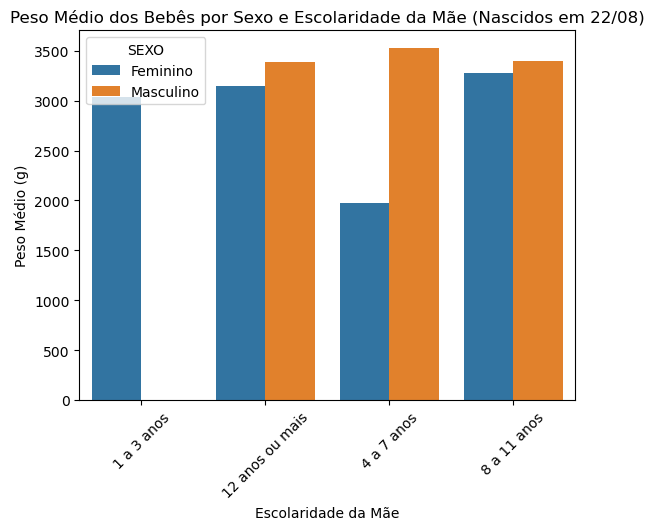

In [11]:
# Converter a coluna de datas para o formato datetime especificando o formato correto
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário

# Filtrar os dados para bebês nascidos no dia 22/08
nascidos_22_08 = sinasc_raw[sinasc_raw['DTNASC'].dt.strftime('%d/%m') == '22/08']

# Calcular o peso médio dos bebês por sexo e escolaridade da mãe
peso_medio = nascidos_22_08.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()

# Exibir o resultado
print(peso_medio)

# Para visualizar os dados
sns.barplot(data=peso_medio, x='ESCMAE', y='PESO', hue='SEXO')
plt.title('Peso Médio dos Bebês por Sexo e Escolaridade da Mãe (Nascidos em 22/08)')
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Peso Médio (g)')
plt.xticks(rotation=45)
plt.show()

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [13]:
# 1. Encontrar o município com o menor número de nascimentos
municipio_menos_nascimentos = sinasc_raw['munResNome'].value_counts().idxmin()
print(f"Município com menos nascimentos: {municipio_menos_nascimentos}")

# Filtrar os dados para o município com menos nascimentos
dados_municipio = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos_nascimentos]

# 2. Calcular a idade média, máxima e mínima das mães nesse município
idade_maes = dados_municipio['IDADEMAE']
idade_maes_media = idade_maes.mean()
idade_maes_maxima = idade_maes.max()
idade_maes_minima = idade_maes.min()
print(f"Idade média das mães: {idade_maes_media}")
print(f"Idade máxima das mães: {idade_maes_maxima}")
print(f"Idade mínima das mães: {idade_maes_minima}")

# 3. Calcular a idade média, máxima e mínima dos pais nesse município
idade_pais = dados_municipio['IDADEPAI']
idade_pais_media = idade_pais.mean()
idade_pais_maxima = idade_pais.max()
idade_pais_minima = idade_pais.min()
print(f"Idade média dos pais: {idade_pais_media}")
print(f"Idade máxima dos pais: {idade_pais_maxima}")
print(f"Idade mínima dos pais: {idade_pais_minima}")

Município com menos nascimentos: Município ignorado - RO
Idade média das mães: 24.0
Idade máxima das mães: 24
Idade mínima das mães: 24
Idade média dos pais: 22.0
Idade máxima dos pais: 22.0
Idade mínima dos pais: 22.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [15]:
# Converter a coluna de datas para o formato datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário

# Filtrar os dados para nascimentos no mês de março
nascidos_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]

# Encontrar o município com o maior número de nascimentos no mês de março
municipio_mais_nascimentos_marco = nascidos_marco['munResNome'].value_counts().idxmax()
print(f"Município com mais nascimentos em março: {municipio_mais_nascimentos_marco}")

# Filtrar os dados para o município com mais nascimentos em março
dados_municipio_marco = nascidos_marco[nascidos_marco['munResNome'] == municipio_mais_nascimentos_marco]

# Calcular a quantidade de filhos vivos média, máxima e mínima nesse município
quantidade_filhos_vivos = dados_municipio_marco['QTDFILVIVO']
filhos_vivos_media = quantidade_filhos_vivos.mean()
filhos_vivos_maxima = quantidade_filhos_vivos.max()
filhos_vivos_minima = quantidade_filhos_vivos.min()
print(f"Quantidade de filhos vivos - Média: {filhos_vivos_media}")
print(f"Quantidade de filhos vivos - Máxima: {filhos_vivos_maxima}")
print(f"Quantidade de filhos vivos - Mínima: {filhos_vivos_minima}")

# Calcular a idade média, máxima e mínima dos pais nesse município
idade_pais_marco = dados_municipio_marco['IDADEPAI']
idade_pais_marco_media = idade_pais_marco.mean()
idade_pais_marco_maxima = idade_pais_marco.max()
idade_pais_marco_minima = idade_pais_marco.min()
print(f"Idade média dos pais: {idade_pais_marco_media}")
print(f"Idade máxima dos pais: {idade_pais_marco_maxima}")
print(f"Idade mínima dos pais: {idade_pais_marco_minima}")

Município com mais nascimentos em março: Porto Velho
Quantidade de filhos vivos - Média: 1.2950558213716108
Quantidade de filhos vivos - Máxima: 9.0
Quantidade de filhos vivos - Mínima: 0.0
Idade média dos pais: 34.62903225806452
Idade máxima dos pais: 62.0
Idade mínima dos pais: 19.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

 Os bebês masculinos tendem a ter um peso médio maior do que os bebês femininos em todas as categorias de escolaridade da mãe, exceto para a categoria "4 a 7 anos" de escolaridade, onde os bebês femininos têm um peso médio muito mais baixo (1978.25g) em comparação com outras faixas. Isso pode indicar problemas de saúde ou nutrição associadas à escolaridade da mãe.

Para mães com "12 anos ou mais" de escolaridade, os bebês masculinos têm um peso médio de 3392.27g, e os bebês femininos têm um peso médio de 3151.17g. A escolaridade mais alta das mães parece estar associada a pesos médios de bebês mais altos, sugerindo que maior escolaridade pode estar correlacionada com melhores condições de saúde e nutrição durante a gravidez.

Em Porto Velho, há uma grande variação na quantidade de filhos vivos por mãe, com uma média de 1.3 filhos. Isso indica que a maioria das mães já tem pelo menos um filho, mas há casos extremos em que algumas mães têm até 9 filhos.

A idade média dos pais é de 34.63 anos, com uma ampla faixa que vai de 19 a 62 anos. Essa variação sugere uma diversidade considerável na faixa etária dos pais, o que pode refletir diferentes estágios da vida em que os homens estão se tornando pais.

Todos os registros de nascimentos no "Município Ignorado - RO" mostram que a idade das mães é uniformemente 24 anos e a dos pais é 22 anos. Isso sugere que há muito poucos registros (possivelmente um único registro) para este município, ou há um problema com a qualidade dos dados ou a forma como eles foram coletados e registrados para este município específico.Todos os registros de nascimentos no "Município Ignorado - RO" mostram que a idade das mães é uniformemente 24 anos e a dos pais é 22 anos. Isso sugere que há muito poucos registros (possivelmente um único registro) para este município, ou há um problema com a qualidade dos dados ou a forma como eles foram coletados e registrados para este município específico.